In [1]:
# 2,2k+ Scotch Whisky Reviews dataset  
#https://www.kaggle.com/datasets/koki25ando/22000-scotch-whisky-reviews

In [ ]:
#load data

In [2]:
import pandas as pd
bottle_data = pd.read_csv('scotch_review.csv')
print(bottle_data.loc[0,:])

Unnamed: 0                                                      1
name                               Johnnie Walker Blue Label, 40%
category                                    Blended Scotch Whisky
review.point                                                   97
price                                                         225
currency                                                        $
description     Magnificently powerful and intense. Caramels, ...
Name: 0, dtype: object


In [3]:
bottle_data.dropna(inplace = True)

In [33]:
distilleries_data = pd.read_excel('whisky_distilleries.xlsx')
print(distilleries_data.head(0))

Empty DataFrame
Columns: [Distillery, Location, Region, Founded, Owner]
Index: []


In [31]:
# add distilleries and region
def insert_distill(name):
    for index,distilleries in distilleries_data.iterrows():
        if distilleries["Distillery"].lower() in name.lower():
            return distilleries["Distillery"]
        else:
            pass
    return "NA"
bottle_data['distilleries']=bottle_data['name'].apply(insert_distill)
def insert_region(name):
    for index,distilleries in distilleries_data.iterrows():
        if distilleries["Distillery"].lower() == name.lower():
            return distilleries["Region"]
        else:
            pass
    return "NA"
bottle_data['region']=bottle_data['distilleries'].apply(insert_region)
print(bottle_data.head())

   Unnamed: 0                                             name  \
0           1                   Johnnie Walker Blue Label, 40%   
1           2  Black Bowmore, 1964 vintage, 42 year old, 40.5%   
2           3      Bowmore 46 year old (distilled 1964), 42.9%   
3           4                   Compass Box The General, 53.4%   
4           5                          Chivas Regal Ultis, 40%   

                     category  review.point     price currency  \
0       Blended Scotch Whisky            97       225        $   
1          Single Malt Scotch            97   4500.00        $   
2          Single Malt Scotch            97  13500.00        $   
3  Blended Malt Scotch Whisky            96       325        $   
4  Blended Malt Scotch Whisky            96       160        $   

                                         description distilleries region  
0  Magnificently powerful and intense. Caramels, ...           NA     NA  
1  What impresses me most is how this whisky evol...    

In [39]:
# extract major flavor which discribe whisky from reviews
whisky_major_flavor = ["floral","fruit","nut","malt","honey","vanilla","spicy","peat","smok","citrus","raisin","deep","complex","cinnamon","sweet","caramel","pepper","leather","chocolate"]
def insert_flavor():
    for flavor in whisky_major_flavor:
        for index, row in bottle_data.iterrows():
            if flavor in row["description"].lower():
                bottle_data.at[index,flavor]=1
            else:
                bottle_data.at[index,flavor]=0
insert_flavor()
print(bottle_data.head())

   Unnamed: 0                                             name  \
0           1                   Johnnie Walker Blue Label, 40%   
1           2  Black Bowmore, 1964 vintage, 42 year old, 40.5%   
2           3      Bowmore 46 year old (distilled 1964), 42.9%   
3           4                   Compass Box The General, 53.4%   
4           5                          Chivas Regal Ultis, 40%   

                     category  review.point     price currency  \
0       Blended Scotch Whisky            97       225        $   
1          Single Malt Scotch            97   4500.00        $   
2          Single Malt Scotch            97  13500.00        $   
3  Blended Malt Scotch Whisky            96       325        $   
4  Blended Malt Scotch Whisky            96       160        $   

                                         description distilleries region  \
0  Magnificently powerful and intense. Caramels, ...           NA     NA   
1  What impresses me most is how this whisky evol...  

In [40]:
#check columns
print(bottle_data.columns)

Index(['Unnamed: 0', 'name', 'category', 'review.point', 'price', 'currency',
       'description', 'distilleries', 'region', 'floral', 'fruit', 'nut',
       'malt', 'honey', 'vanilla', 'spicy', 'peat', 'smok', 'citrus', 'raisin',
       'deep', 'complex', 'cinnamon', ' sweet', 'caramel', 'pepper', 'leather',
       'chocolate'],
      dtype='object')


In [42]:
# Data Investigation
def data_inv(df):
    print('number of row (items): ',df.shape[0])
    print('dataset variables: ',df.shape[1])
    print('-'*10)
    print('dateset columns: \n')
    print(df.columns)
    print('-'*10)
    print('data-type of each column: \n')
    print(df.dtypes)
    print('-'*10)
    print('missing rows in each column: \n')
    c=df.isnull().sum()
    print(c[c>0])
data_inv(bottle_data)

number of row (items):  2247
dataset variables:  28
----------
dateset columns: 

Index(['Unnamed: 0', 'name', 'category', 'review.point', 'price', 'currency',
       'description', 'distilleries', 'region', 'floral', 'fruit', 'nut',
       'malt', 'honey', 'vanilla', 'spicy', 'peat', 'smok', 'citrus', 'raisin',
       'deep', 'complex', 'cinnamon', ' sweet', 'caramel', 'pepper', 'leather',
       'chocolate'],
      dtype='object')
----------
data-type of each column: 

Unnamed: 0        int64
name             object
category         object
review.point      int64
price            object
currency         object
description      object
distilleries     object
region           object
floral          float64
fruit           float64
nut             float64
malt            float64
honey           float64
vanilla         float64
spicy           float64
peat            float64
smok            float64
citrus          float64
raisin          float64
deep            float64
complex         floa

In [43]:
# save to csv for analysis
bottle_data.to_csv("whisky_data_processed.csv")

floral T-statistic: -0.40842808316415247
floral p-value: 0.6829984060131102
----------------------------------------------------------------------
fruit T-statistic: 4.985344112286456
fruit p-value: 6.65869017794915e-07
fruit has a significant difference in review points between the two groups.
fruit present will got higher reviews point


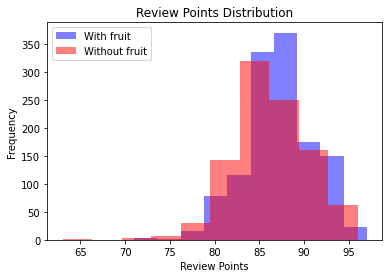

----------------------------------------------------------------------
nut T-statistic: 1.5092897269325019
nut p-value: 0.13136560246841325
----------------------------------------------------------------------
malt T-statistic: -2.0812212299469355
malt p-value: 0.037526843973067915
malt has a significant difference in review points between the two groups.
malt present will got lower reviews point


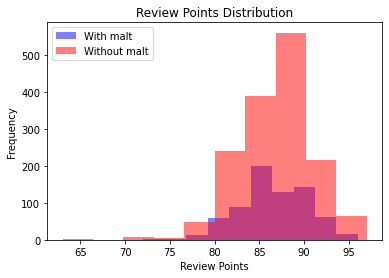

----------------------------------------------------------------------
honey T-statistic: 4.099032065089821
honey p-value: 4.2964495667118255e-05
honey has a significant difference in review points between the two groups.
honey present will got higher reviews point


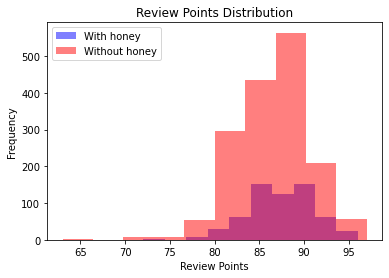

----------------------------------------------------------------------
vanilla T-statistic: 1.3449124892419928
vanilla p-value: 0.1787894658629225
----------------------------------------------------------------------
spicy T-statistic: 0.641947422831677
spicy p-value: 0.5209729200791647
----------------------------------------------------------------------
peat T-statistic: 2.906170195142871
peat p-value: 0.0036946912705950966
peat has a significant difference in review points between the two groups.
peat present will got higher reviews point


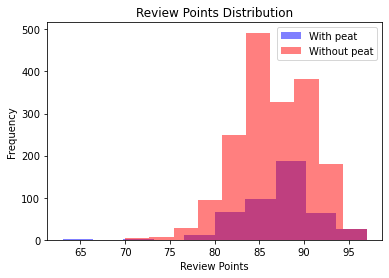

----------------------------------------------------------------------
smok T-statistic: 6.353990290591633
smok p-value: 2.5328279428756487e-10
smok has a significant difference in review points between the two groups.
smok present will got higher reviews point


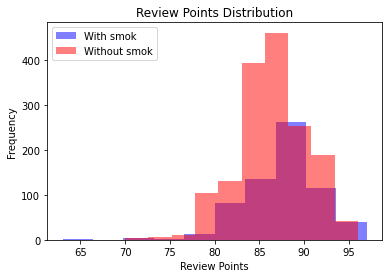

----------------------------------------------------------------------
citrus T-statistic: 2.228343133637672
citrus p-value: 0.025956419679414807
citrus has a significant difference in review points between the two groups.
citrus present will got higher reviews point


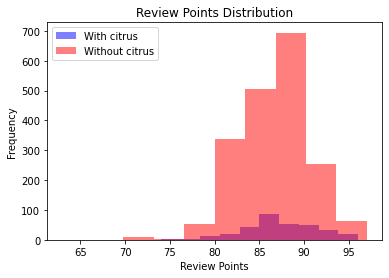

----------------------------------------------------------------------
raisin T-statistic: 2.5789388654246514
raisin p-value: 0.009973606742116344
raisin has a significant difference in review points between the two groups.
raisin present will got higher reviews point


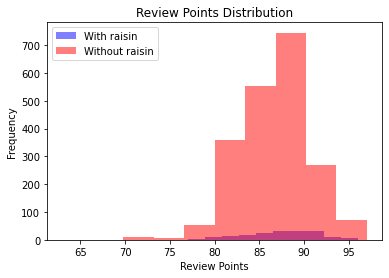

----------------------------------------------------------------------
deep T-statistic: 4.1862905869167575
deep p-value: 2.94494269024577e-05
deep has a significant difference in review points between the two groups.
deep present will got higher reviews point


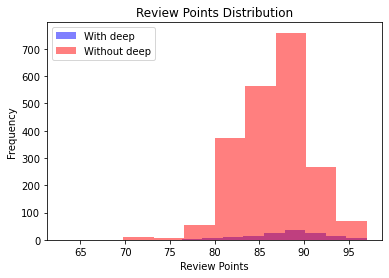

----------------------------------------------------------------------
complex T-statistic: 10.050545008367935
complex p-value: 2.8174165508062476e-23
complex has a significant difference in review points between the two groups.
complex present will got higher reviews point


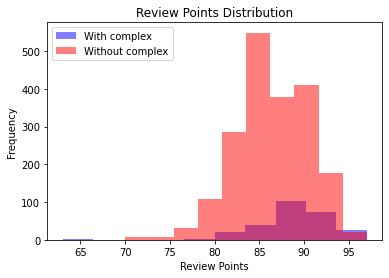

----------------------------------------------------------------------
cinnamon T-statistic: 4.879723870318927
cinnamon p-value: 1.1370395771945696e-06
cinnamon has a significant difference in review points between the two groups.
cinnamon present will got higher reviews point


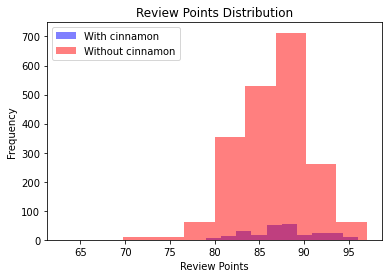

----------------------------------------------------------------------
sweet T-statistic: 0.19698949071367097
sweet p-value: 0.8438536093118908
----------------------------------------------------------------------
caramel T-statistic: 2.1846866026222043
caramel p-value: 0.029015017409518094
caramel has a significant difference in review points between the two groups.
caramel present will got higher reviews point


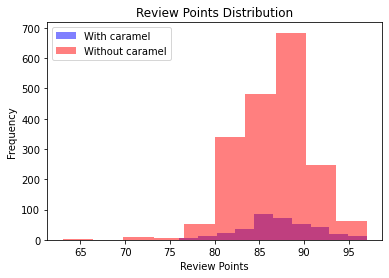

----------------------------------------------------------------------
pepper T-statistic: 3.441309796445601
pepper p-value: 0.0005895053479204503
pepper has a significant difference in review points between the two groups.
pepper present will got higher reviews point


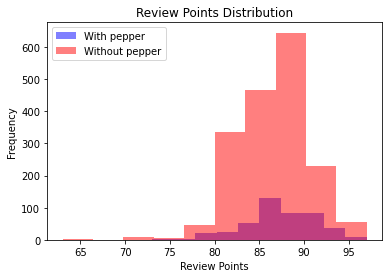

----------------------------------------------------------------------
leather T-statistic: 6.044698436697576
leather p-value: 1.7482025221922382e-09
leather has a significant difference in review points between the two groups.
leather present will got higher reviews point


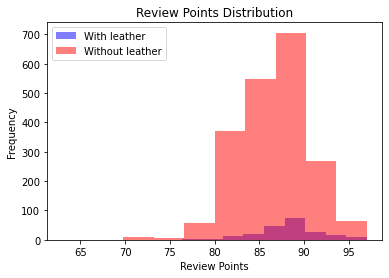

----------------------------------------------------------------------
chocolate T-statistic: 4.710609276726233
chocolate p-value: 2.6208229419624353e-06
chocolate has a significant difference in review points between the two groups.
chocolate present will got higher reviews point


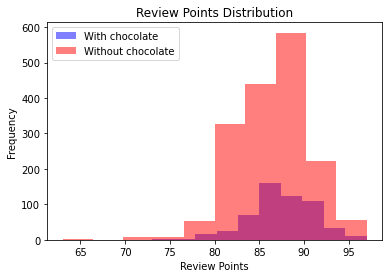

----------------------------------------------------------------------


In [63]:
# Hypothesis Testing (T-test)
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
data = pd.read_csv('whisky_data_processed.csv', encoding = "ISO-8859-1")
whisky_major_flavor = ["floral","fruit","nut","malt","honey","vanilla","spicy","peat","smok","citrus","raisin","deep","complex","cinnamon","sweet","caramel","pepper","leather","chocolate"]
flavor_highpoint = []
flavor_lowpoint = []

for flavor in whisky_major_flavor:
    # Split the data into two groups based on the "floral" flavor
    group1 = data[data[flavor] == 1]
    group2 = data[data[flavor] == 0]

    # Extract the review points for each group
    review_points_group1 = group1['point']
    review_points_group2 = group2['point']

    # Perform the independent samples t-test
    t_statistic, p_value = ttest_ind(review_points_group1, review_points_group2)

    # Print the results
    print(f'{flavor} T-statistic: {t_statistic}')
    print(f'{flavor} p-value: {p_value}')
    if p_value < 0.05:
        print(f'{flavor} has a significant difference in review points between the two groups.')
        
        # compare the means to check the flavor got higher or lower reviews points
        mean_present = group1['point'].mean()
        mean_absent = group2['point'].mean()
        if mean_present > mean_absent:
            print(f'{flavor} present will got higher reviews point')
            flavor_highpoint.append(flavor)
        else:
            print(f'{flavor} present will got lower reviews point')
            flavor_lowpoint.append(flavor)

        # Create a figure and axis object
        fig, ax = plt.subplots()

        # Plotting the review points with floral flavor
        ax.hist(group1['point'], bins=10, color='blue', alpha=0.5, label=f'With {flavor}')

        # Plotting the review points without floral flavor
        ax.hist(group2['point'], bins=10, color='red', alpha=0.5, label=f'Without {flavor}')

        # Add labels and title to the plot
        ax.set_xlabel('Review Points')
        ax.set_ylabel('Frequency')
        ax.set_title('Review Points Distribution')

        # Add a legend
        ax.legend()

        # Show the plot
        plt.show()
    print("----------------------------------------------------------------------")

In [64]:
print(f"the flavor that got a higher review points: {flavor_highpoint}")
print(f"the flavor that got a lower review points: {flavor_lowpoint}")

the flavor that got a higher review points: ['fruit', 'honey', 'peat', 'smok', 'citrus', 'raisin', 'deep', 'complex', 'cinnamon', 'caramel', 'pepper', 'leather', 'chocolate']
the flavor that got a lower review points: ['malt']


In [66]:
# Hypothesis Testing (MANOVA) for double check
import pandas as pd
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

# Load the CSV data into a DataFrame
data = pd.read_csv('whisky_data_processed.csv', encoding = "ISO-8859-1")

# Create a subset of the data with relevant columns (flavors and review points)
subset_data = data[['floral', 'fruit', 'nut','malt', 'honey', 'vanilla', 'spicy', 'peat', 'smok', 'citrus', 'raisin','deep', 'complex', 'cinnamon', 'sweet', 'caramel', 'pepper', 'leather','chocolate','point']]

# Perform MANOVA
manova = MANOVA.from_formula('C(point) ~ floral + fruit + nut + malt + honey + vanilla + spicy + peat + smok + citrus + raisin + deep + complex + cinnamon + sweet + caramel + pepper + leather + chocolate', data=subset_data)
result = manova.mv_test()

# Print the MANOVA results
print(result.summary())

                                Multivariate linear model
                                                                                          
------------------------------------------------------------------------------------------
       Intercept               Value         Num DF   Den DF         F Value        Pr > F
------------------------------------------------------------------------------------------
          Wilks' lambda              0.0000 29.0000 2197.0000 7182873598063794.0000 0.0000
         Pillai's trace              1.0000 29.0000 2197.0000 7182873598063794.0000 0.0000
 Hotelling-Lawley trace 94812623734114.7031 29.0000 2197.0000 7182873598063792.0000 0.0000
    Roy's greatest root 94812623734114.7031 29.0000 2197.0000 7182873598063793.0000 0.0000
------------------------------------------------------------------------------------------
                                                                                          
--------------------------------